In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('employee.csv')

In [3]:
data.head()

,Age,Attrition,Business_Travel,Daily_Rate,Department,Distance_From_Home,Education,Education_Field,Employee_Count,Employee_Number,...,Relationship_Satisfaction,Standard_Hours,Stock_Option_Level,Total_Working_Years,Training_Times_Last_Year,Work_Life_Balance,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Curr_Manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape

(1470, 35)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1470 non-null   int64 
 1   Attrition                   1470 non-null   object
 2   Business_Travel             1470 non-null   object
 3   Daily_Rate                  1470 non-null   int64 
 4   Department                  1470 non-null   object
 5   Distance_From_Home          1470 non-null   int64 
 6   Education                   1470 non-null   int64 
 7   Education_Field             1470 non-null   object
 8   Employee_Count              1470 non-null   int64 
 9   Employee_Number             1470 non-null   int64 
 10  Environment_Satisfaction    1470 non-null   int64 
 11  Gender                      1470 non-null   object
 12  Hourly_Rate                 1470 non-null   int64 
 13  Job_Involvement             1470 non-null   int6

## Data Cleaning

### Column name

In [6]:
data.columns = data.columns.str.lower()

### Dropping unnecessary column

In [7]:
data=data.drop(['employee_count','employee_number','job_role','standard_hours','over18'],axis=1)

### Category column (frequency encoding)

In [9]:
cate_col = ['business_travel','department','education','education_field','marital_status']

for col in cate_col:
    frequency_encoding_map = data[col].value_counts(normalize=True)
    data[col]=data[col].map(frequency_encoding_map)

### Binary Column (binary encoding)

In [10]:
data['gender']=np.where(data['gender']=='Female',0,1)

In [11]:
data['attrition']=np.where(data['attrition']=='Yes',1,0)

In [12]:
data['overtime']=np.where(data['overtime']=='Yes',1,0)

In [13]:
#working_data= data[['years_at_company','years_in_current_role','years_since_last_promotion','years_with_curr_manager','total_working_years']]

#sns.heatmap(working_data.corr(), annot =True, vmax=1, vmin=-1, cmap='RdBu');

In [14]:
#from sklearn.decomposition import PCA

#pca_data = working_data - working_data.mean()

#pca = PCA(n_components=1)
#pca.fit(pca_data)

In [15]:
#pca.explained_variance_ratio_

In [16]:
#pca.components_

* PC1: higher means more working experience

In [17]:
#pca_df = pd.DataFrame(pca.transform(pca_data),columns=['working_experience'])

#pca_df.head()

In [18]:
#data = pd.concat([data,pca_df], axis=1)

### Final data 

In [19]:
data.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,...,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,1,0.709524,1102,0.303401,1,0.191837,0.412245,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,0.188435,279,0.653741,8,0.115646,0.412245,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,0.709524,1373,0.653741,2,0.191837,0.055782,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,0.188435,1392,0.653741,3,0.270748,0.412245,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,0.709524,591,0.653741,2,0.115646,0.315646,1,1,...,3,4,1,6,3,3,2,2,2,2


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         1470 non-null   int64  
 1   attrition                   1470 non-null   int32  
 2   business_travel             1470 non-null   float64
 3   daily_rate                  1470 non-null   int64  
 4   department                  1470 non-null   float64
 5   distance_from_home          1470 non-null   int64  
 6   education                   1470 non-null   float64
 7   education_field             1470 non-null   float64
 8   environment_satisfaction    1470 non-null   int64  
 9   gender                      1470 non-null   int32  
 10  hourly_rate                 1470 non-null   int64  
 11  job_involvement             1470 non-null   int64  
 12  job_level                   1470 non-null   int64  
 13  job_satisfaction            1470 

## Prepare for Modelling

### Splitting Data

In [21]:
from sklearn.model_selection import train_test_split

X=data.drop(['attrition'],axis=1)
y=data['attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

### Balancing data

In [22]:
y_train.value_counts()

attrition
0    978
1    198
Name: count, dtype: int64

In [23]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=42)

X_train, y_train = sm.fit_resample(X_train, y_train)

In [24]:
print("After oversampling: ", np.bincount(y_train))

After oversampling:  [978 978]


### Scaling data

In [25]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

## Modelling

### Model 1: KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': range(5,100), "metric":["minkowski", "manhattan"]}

gridsearch = GridSearchCV(KNeighborsClassifier(),parameters,scoring='recall',cv=5)

gridsearch.fit(X_train_std, y_train)

gridsearch.best_params_

{'metric': 'minkowski', 'n_neighbors': 5}

In [27]:
knn = KNeighborsClassifier(**gridsearch.best_params_)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

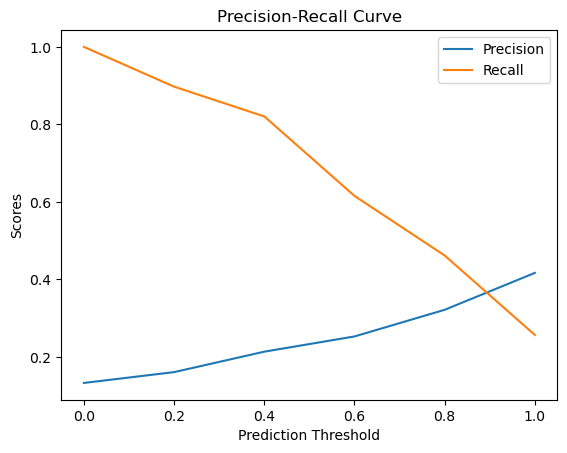

In [28]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

p_curve, r_curve, t_curve = precision_recall_curve(y_test, knn.predict_proba(X_test_std)[:,1])

plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.legend()
plt.title('Precision-Recall Curve')
# plt.grid(True)
plt.show()

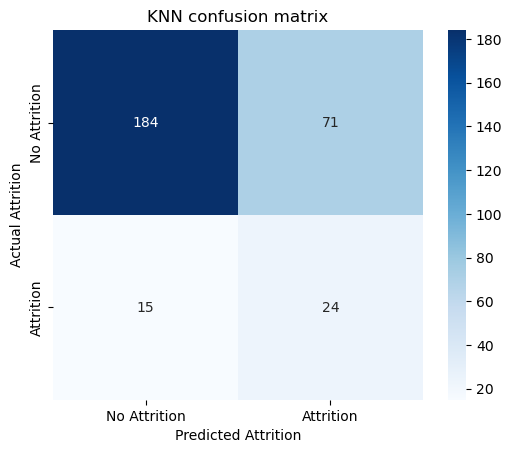

In [94]:
from sklearn.metrics import confusion_matrix
knn_confusion = confusion_matrix(y_test, knn.predict_proba(X_test_std)[:,1]>.4)

sns.heatmap(
    knn_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["No Attrition", "Attrition"],        
    yticklabels=["No Attrition", "Attrition"]
).set(
    xlabel='Predicted Attrition',
    ylabel='Actual Attrition',
    title='KNN confusion matrix'
);

In [82]:
from sklearn.metrics import recall_score, accuracy_score
print(f"recall: {recall_score(y_test, knn.predict_proba(X_test_std)[:,1]>.4)}")
print(f"accuracy: {accuracy_score(y_test, knn.predict_proba(X_test_std)[:,1]>.4)}")

recall: 0.6153846153846154
accuracy: 0.7074829931972789


### Model 2: Logistic

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters ={'C': np.linspace(.1, 2, 20), 'penalty':['l1','l2'], 'solver' : ['liblinear','saga']}

gridsearch = GridSearchCV( LogisticRegression(random_state=42),parameters,scoring='recall',cv=5)

gridsearch.fit(X_train_std,y_train)

gridsearch.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [32]:
lg=LogisticRegression(**gridsearch.best_params_)

lg.fit(X_train_std, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

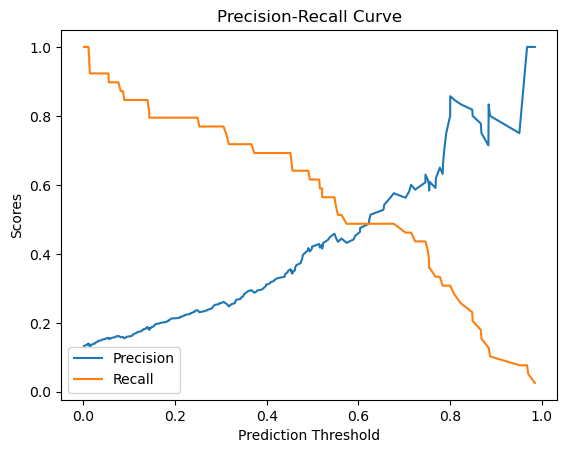

In [33]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

p_curve, r_curve, t_curve = precision_recall_curve(y_test, lg.predict_proba(X_test_std)[:,1])

plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.legend()
plt.title('Precision-Recall Curve')
# plt.grid(True)
plt.show()

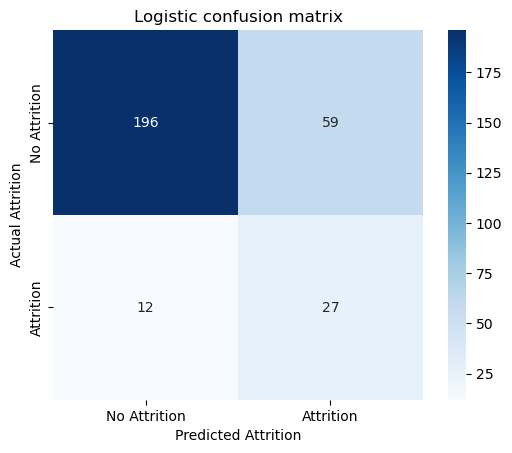

In [60]:
from sklearn.metrics import confusion_matrix
lg_confusion = confusion_matrix(y_test, lg.predict_proba(X_test_std)[:,1]>.4)

sns.heatmap(
    lg_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["No Attrition", "Attrition"],        
    yticklabels=["No Attrition", "Attrition"]
).set(
    xlabel='Predicted Attrition',
    ylabel='Actual Attrition',
    title='Logistic confusion matrix'
);

In [62]:
from sklearn.metrics import recall_score, accuracy_score
print(f"recall: {recall_score(y_test, lg.predict_proba(X_test_std)[:,1]>.4)}")
print(f"accuracy: {accuracy_score(y_test, lg.predict_proba(X_test_std)[:,1]>.4)}")

recall: 0.6923076923076923
accuracy: 0.7585034013605442


### Model 3: Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters ={'max_depth': np.arange(1,20,1), 'min_samples_leaf': np.arange(1,20,1)}

gridsearch = GridSearchCV( DecisionTreeClassifier(random_state=42),parameters,scoring='recall',cv=5)

gridsearch.fit(X_train_std,y_train)

gridsearch.best_params_


{'max_depth': 8, 'min_samples_leaf': 1}

In [37]:
dt = DecisionTreeClassifier(random_state=42,**gridsearch.best_params_)
dt.fit(X_train_std,y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

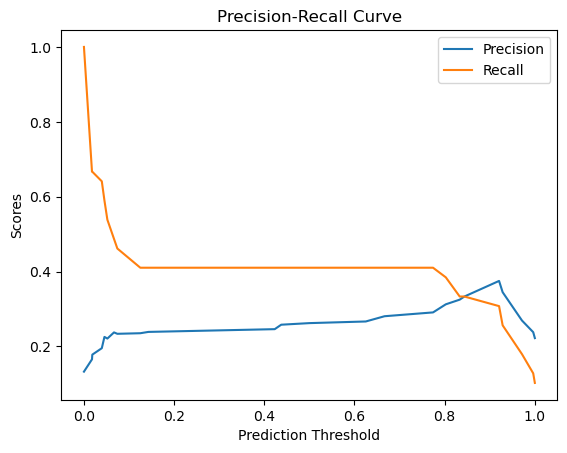

In [38]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

p_curve, r_curve, t_curve = precision_recall_curve(y_test, dt.predict_proba(X_test_std)[:,1])

plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.legend()
plt.title('Precision-Recall Curve')
# plt.grid(True)
plt.show()

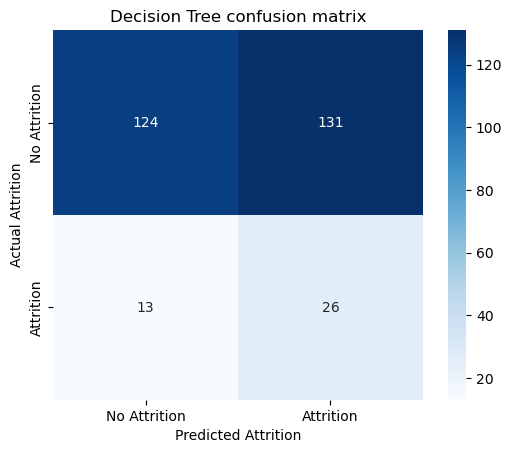

In [74]:
from sklearn.metrics import confusion_matrix
dt_confusion = confusion_matrix(y_test, dt.predict_proba(X_test_std)[:,1]>.01)

sns.heatmap(
    dt_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["No Attrition", "Attrition"],        
    yticklabels=["No Attrition", "Attrition"]
).set(
    xlabel='Predicted Attrition',
    ylabel='Actual Attrition',
    title='Decision Tree confusion matrix'
);

In [73]:
from sklearn.metrics import recall_score, accuracy_score
print(f"recall: {recall_score(y_test, dt.predict_proba(X_test_std)[:,1]>.01)}")
print(f"accuracy: {accuracy_score(y_test, dt.predict_proba(X_test_std)[:,1]>.01)}")

recall: 0.6666666666666666
accuracy: 0.5102040816326531


### Model 4: Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': np.arange(start=100, stop=1100, step=100),
    'max_features': [None, "sqrt"],
    'max_samples': [None, .3, .5, .9],
    'max_depth': np.arange(start=1, stop=11, step=1),
    'min_samples_leaf': [2, 5, 10, 20, 100],
}

gridsearch = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1), 
    parameters,
    n_iter=100,
    scoring="recall",
    cv=5
)

gridsearch.fit(X_train_std,y_train)

gridsearch.best_params_

{'n_estimators': 1000,
 'min_samples_leaf': 2,
 'max_samples': None,
 'max_features': 'sqrt',
 'max_depth': 8}

In [42]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1,**gridsearch.best_params_)
rf.fit(X_train_std,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, n_estimators=1000,
                       n_jobs=-1, random_state=42)

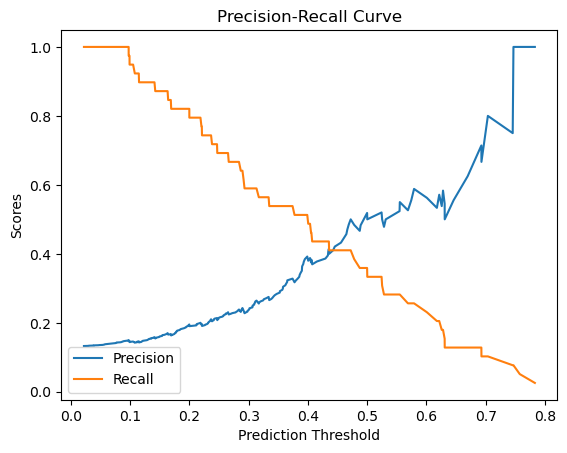

In [43]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

p_curve, r_curve, t_curve = precision_recall_curve(y_test, rf.predict_proba(X_test_std)[:,1])

plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.legend()
plt.title('Precision-Recall Curve')
# plt.grid(True)
plt.show()

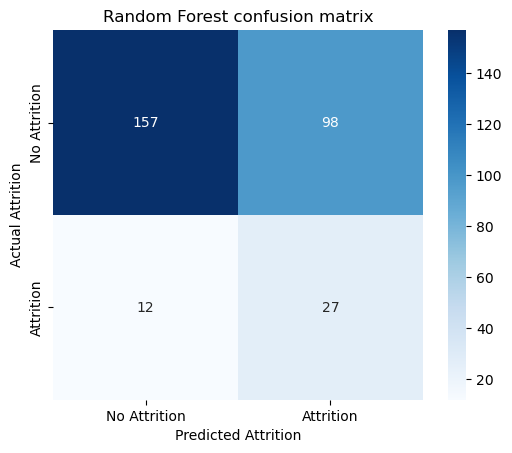

In [67]:
from sklearn.metrics import confusion_matrix
rf_confusion = confusion_matrix(y_test, rf.predict_proba(X_test_std)[:,1]>.25)

sns.heatmap(
    rf_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["No Attrition", "Attrition"],        
    yticklabels=["No Attrition", "Attrition"]
).set(
    xlabel='Predicted Attrition',
    ylabel='Actual Attrition',
    title='Random Forest confusion matrix'
);

In [69]:
from sklearn.metrics import recall_score, accuracy_score
print(f"recall: {recall_score(y_test, rf.predict_proba(X_test_std)[:,1]>.25)}")
print(f"accuracy: {accuracy_score(y_test, rf.predict_proba(X_test_std)[:,1]>.25)}")

recall: 0.6923076923076923
accuracy: 0.6258503401360545


### Model 5: Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    'n_estimators': [20, 40, 60, 80, 100, 200],
    'learning_rate': [.01, .1],
    'max_features': ["sqrt"],
    'subsample': [.8, .9, .95],
    'max_depth': np.arange(start=3, stop=12, step=2),
    'min_samples_leaf': [2, 5, 10]    
}

gridsearch = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42), 
    parameters,
    n_iter=100,
    scoring="recall",
    cv=5
)

gridsearch.fit(X_train_std, y_train)

gridsearch.best_params_

{'subsample': 0.8,
 'n_estimators': 20,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 11,
 'learning_rate': 0.01}

In [47]:
gb = GradientBoostingClassifier(random_state=42,**gridsearch.best_params_)

gb.fit(X_train_std,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=11,
                           max_features='sqrt', min_samples_leaf=2,
                           n_estimators=20, random_state=42, subsample=0.8)

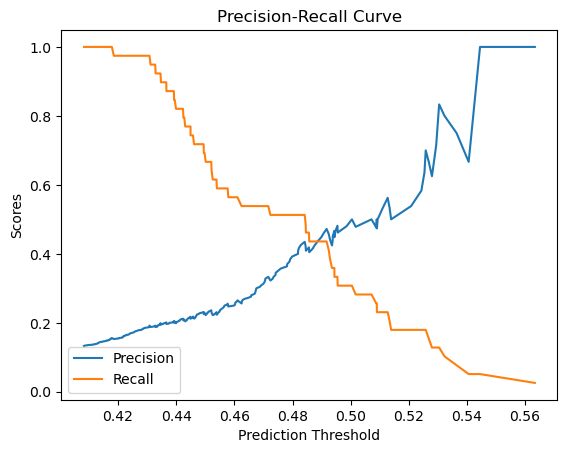

In [49]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

p_curve, r_curve, t_curve = precision_recall_curve(y_test, gb.predict_proba(X_test_std)[:,1])

plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.legend()
plt.title('Precision-Recall Curve')
# plt.grid(True)
plt.show()

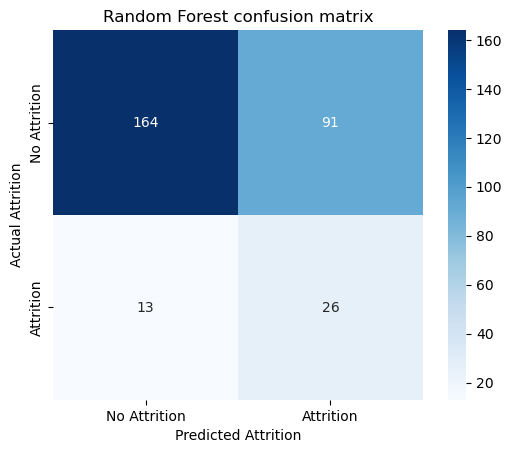

In [90]:
from sklearn.metrics import confusion_matrix
rf_confusion = confusion_matrix(y_test, gb.predict_proba(X_test_std)[:,1]>.45)

sns.heatmap(
    rf_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["No Attrition", "Attrition"],        
    yticklabels=["No Attrition", "Attrition"]
).set(
    xlabel='Predicted Attrition',
    ylabel='Actual Attrition',
    title='Random Forest confusion matrix'
);

In [91]:
from sklearn.metrics import recall_score, accuracy_score
print(f"recall: {recall_score(y_test, gb.predict_proba(X_test_std)[:,1]>.45)}")
print(f"accuracy: {accuracy_score(y_test, gb.predict_proba(X_test_std)[:,1]>.45)}")

recall: 0.6666666666666666
accuracy: 0.6462585034013606


### Top 5 feature

<Axes: ylabel='feature'>

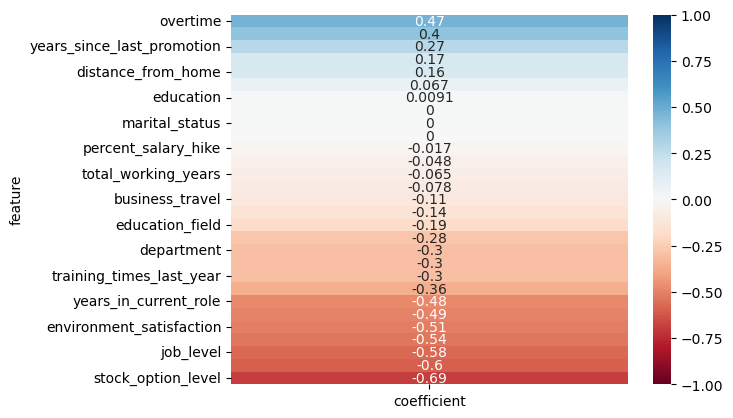

In [153]:
coefficient=lg.coef_[0]

feature_importance_df = pd.DataFrame(
    {'feature': X.columns,
     'coefficient' : coefficient})

sns.heatmap(feature_importance_df.sort_values(['coefficient'],ascending=False).set_index('feature'),annot=True, vmin=-1, vmax=1, cmap="RdBu")

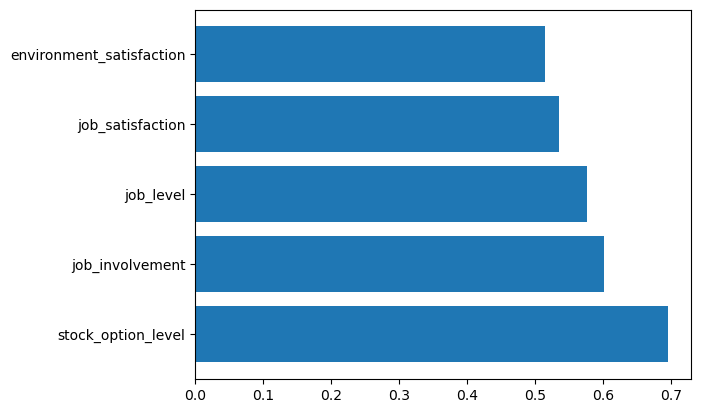

In [152]:
feature_importance_df['abs_coefficient'] = np.abs(feature_importance_df['coefficient'])
feature_importance_df_sorted = feature_importance_df.sort_values(['abs_coefficient'],ascending=False)

plt.barh(data=feature_importance_df_sorted.head(5), y= 'feature', width= 'abs_coefficient');

## Conclusion

### Best Model: Logistic Model
* When all the models' recalls are around 0.66, **Logistic model** has the highest accuracy 0.76

| Model             | Recall   | Accuracy |
|-------------------|----------|----------|
| KNN               | 0.61     | 0.71     |
| **Logistic**      | **0.69** | **0.76** |
| Decision Tree     | 0.67     | 0.51     |
| Random Forest     | 0.69     | 0.63     |
| Gradient Boosting | 0.67     | 0.64     |

### Top 5 Feature
* **Stock Option Level**: lower the option level, higher the possibility to leave the company.
* **Job Involvement**: lower the job involvement, higher the possibility to leave the company.
* **Job Level**: lower the job level, higher the possibility to leave the company.
* **Job Satisfaction**: lower the job satisfaction, higher the possibility to leave the company.
* **Environment Satisfaction**: lower the environment satisfaction, higher the possibility to leave the company.

| Feature                  | Coefficient |
|--------------------------|-------------|
| Stock Option Level       | -0.69       |
| Job Involvement          | -0.60       |
| Job Level                | -0.58       |
| Job Satisfaction         | -0.54       |
| Environment Satisfaction | -0.51       |     |